# Kaggle-Titanic

### The object of this project is to predict the survival of passengers in testing data based on training data

### https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat([train, test], ignore_index=True)
print (train.shape, test.shape)

(891, 12) (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print (train.info())
print ('-' * 30)
print (test.info())
# train.isnull().sum() 
# can count all Nan value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Analysis

## 1. total survived: 38%

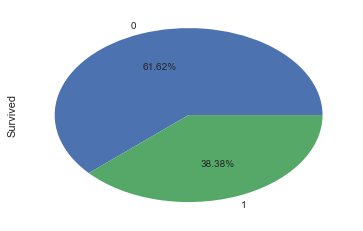

In [6]:
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
# sns.countplot(df['Survived'])

## 2. sex, male survived: 19%, female survived: 74%

In [7]:
print ("total male: ", train['Survived'][train['Sex'] == 'male'].count())
print ("male survived: ", train['Survived'][train['Sex'] == 'male'].sum())
print ('m survived %: ', train['Survived'][train['Sex'] == 'male'].sum() / train['Survived'][train['Sex'] == 'male'].count())
print ('-' * 30)
print ("total female: ", train['Survived'][train['Sex'] == 'female'].count())
print ("female survived: ", train['Survived'][train['Sex'] == 'female'].sum())
print ('f survived %: ', train['Survived'][train['Sex'] == 'female'].sum() / train['Survived'][train['Sex'] == 'female'].count())

total male:  577
male survived:  109
m survived %:  0.188908145581
------------------------------
total female:  314
female survived:  233
f survived %:  0.742038216561


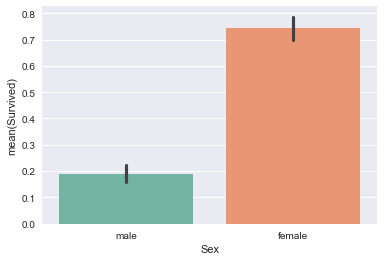

In [8]:
sns.barplot(x='Sex', y = 'Survived', data=train, palette='Set2') #Set: tune clor

## 3. Pclass, class1 survived: 63%, class2 survived: 47%, class3 survived 24%

class1 survived %:  62.962962963 %
class2 survived %:  47.2826086957 %
class3 survived %:  24.2362525458 %


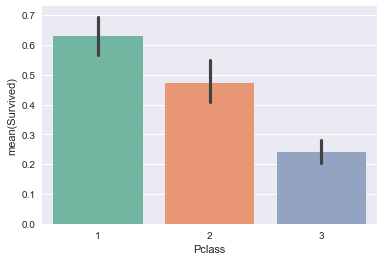

In [9]:
print ('class1 survived %: ', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1] * 100, '%')
print ('class2 survived %: ', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1] * 100, '%')
print ('class3 survived %: ', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1] * 100, '%')
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set2')

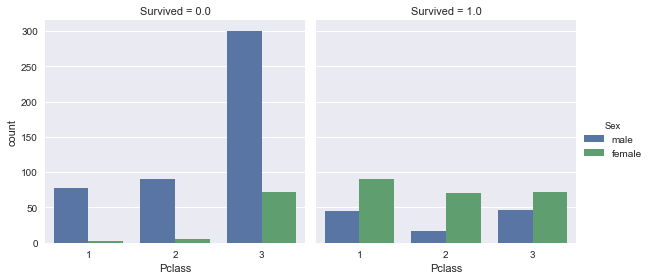

In [10]:
sns.factorplot(x='Pclass', hue='Sex', col='Survived', data=all_data, kind='count')

### women in class 1 and class 2 almost survived

## 4. Fare, higher fare has higher chance to survived

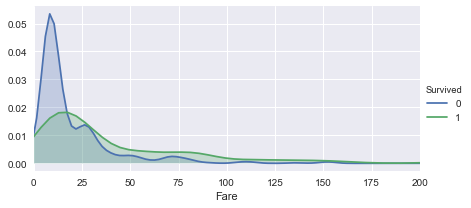

In [11]:
facet = sns.FacetGrid(train, hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Fare', shade=True)

## plot setting
facet.set(xlim=(0, 200)) # 1 Fare:500
facet.add_legend()

### Pclass has strong correlation with Fare

             Fare
Pclass           
1       87.508992
2       21.179196
3       13.302889


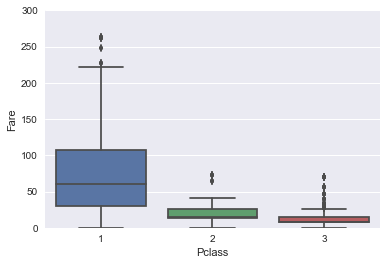

In [12]:
#sns.regplot(x=all_data["Pclass"], y=all_data["Fare"], fit_reg=False)
fig = sns.boxplot('Pclass', 'Fare', data=all_data)
fig.set(ylim=(0, 300)) # there's a $500 at Pclass1
print (all_data[['Pclass', 'Fare']].groupby(['Pclass']).mean())

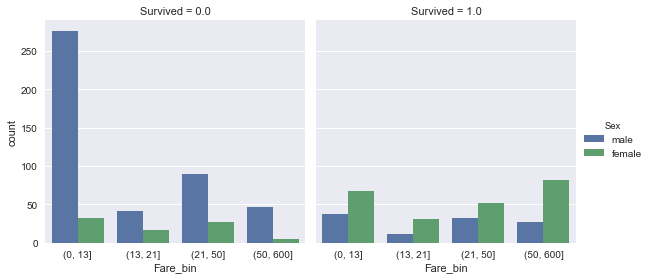

In [13]:
#all_data.head()
#all_data['Fare'].fillna(13.3, inplace=True) # reason is at next part
all_data['Fare_bin'] = all_data['Fare']
bins=[0,13, 21, 50, 600]
all_data['Fare_bin'] = pd.cut(all_data['Fare_bin'], bins)
sns.factorplot(x='Fare_bin', hue='Sex', col='Survived', data=all_data, kind='count')

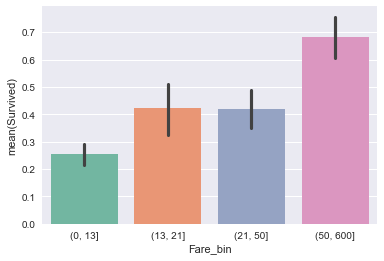

In [14]:
sns.barplot(x='Fare_bin', y='Survived', data=all_data, palette='Set2')

In [15]:
#tt = all_data.drop(all_data[(all_data['Pclass'] != 3) & (all_data['Sex'] == 'female')].index)

In [16]:
#all_data['m_child'] = (all_data['Sex'] == 'male') & (all_data['Parch'] != 0) & (all_data['SibSp'] == 0)
#all_data['m_partner'] = (all_data['Sex'] == 'male') & (all_data['Parch'] == 0) & (all_data['SibSp'] != 0)

#all_data['f_child'] = (all_data['Sex'] == 'female') & (all_data['Parch'] != 0) & (all_data['SibSp'] == 0)
#all_data['f_partner'] = (all_data['Sex'] == 'female') & (all_data['Parch'] == 0) & (all_data['SibSp'] != 0)

#all_data['m_single'] = (all_data['Sex'] == 'male') & (all_data['SibSp'] + all_data['Parch'] == 0)
#all_data['m_family'] = (all_data['Sex'] == 'male') & (all_data['SibSp'] + all_data['Parch'] != 0)
#all_data['f_class3'] = (all_data['Sex'] == 'female') & (all_data['Pclass'] == 3)

In [18]:
#sns.factorplot(x='Pclass', hue='m_partner', col='Survived', data=all_data, kind='count')

In [19]:
#sns.factorplot(x='Pclass', hue='m_partner', col='Survived', data=all_data, kind='count')

In [20]:
#sns.factorplot(x='Pclass', hue='m_single', col='Survived', data=all_data, kind='count')

In [21]:
#sns.barplot(x='m_single', y='Survived', data=all_data)
#sns.barplot(x='Fare_bin', y='Survived', data=all_data, palette='Set2')

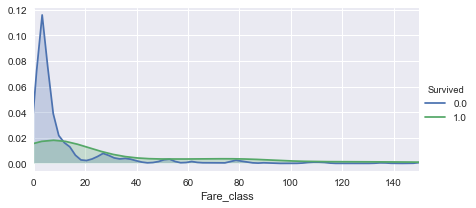

In [22]:
all_data['Fare_class'] = all_data['Fare'] / all_data['Pclass']
facet = sns.FacetGrid(all_data[0:800], hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Fare_class', shade=True)

## plot setting
facet.set(xlim=(0, 150)) # 1 Fare:500
facet.add_legend()

In [23]:
#all_data[''] = all_data['Fare'] / all_data['Pclass']
#bins=[0,19,23, 1000]
bins=[0,4,10, 87, 1000]
all_data['Fare_class'] = pd.cut(all_data['Fare_class'], bins)
print (all_data.groupby('Fare_class')['Survived'].mean())

Fare_class
(0, 4]        0.215805
(4, 10]       0.375000
(10, 87]      0.526119
(87, 1000]    0.761905
Name: Survived, dtype: float64


## 5. Age

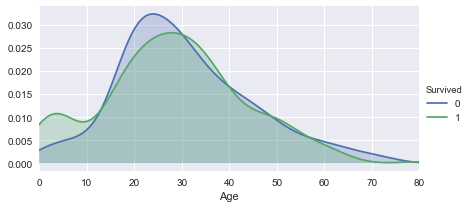

In [24]:
facet = sns.FacetGrid(train, hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)

## plot setting
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

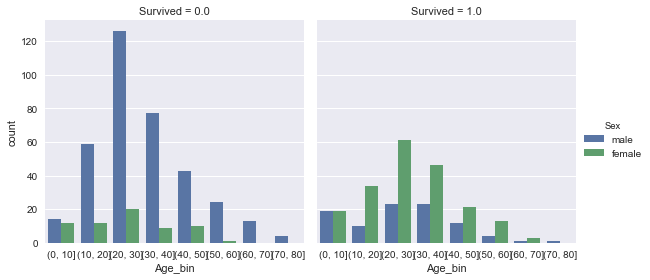

In [25]:
all_data['Age_bin'] = all_data['Age']
bins=[0,10, 20, 30, 40, 50, 60, 70, 80]
all_data['Age_bin'] = pd.cut(all_data['Age_bin'], bins)
sns.factorplot(x='Age_bin', hue='Sex', col='Survived', data=all_data, kind='count')

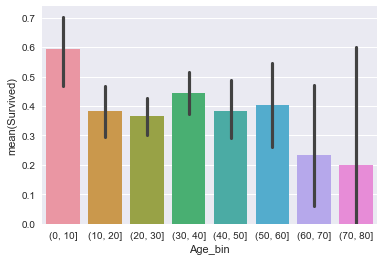

In [26]:
sns.barplot(x='Age_bin', y='Survived', data=all_data)

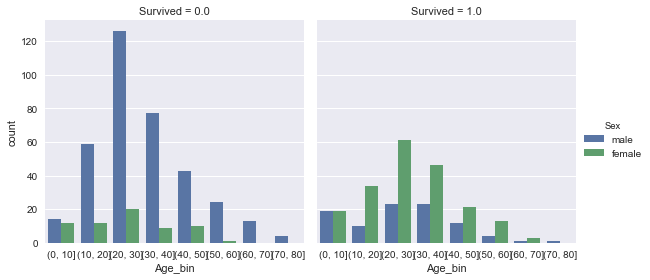

In [27]:
sns.factorplot(x='Age_bin', hue='Sex', col='Survived', data=all_data, kind='count')

## 6. Family number

### group around 2 to 4 has higher chance to survived

In [28]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
#all_data.head()

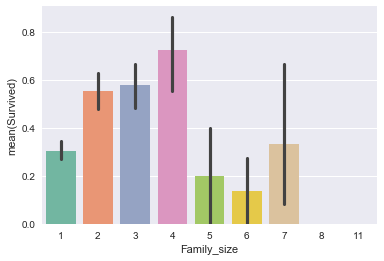

In [29]:
sns.barplot(x='Family_size', y='Survived', data=all_data, palette='Set2')

In [30]:
pd.crosstab(all_data['Family_size'], all_data['Sex']).T.style.background_gradient(cmap='summer_r')

## 7. Title

### put all Title into 4 Category- Master, Miss, Mr and Mrs. Mr has less 20% to survived, others hv more than 60% to survived

In [31]:
all_data['Title'] = all_data['Name'].map(lambda x: x.split(', ')[1].split('.')[0])

In [32]:
print (all_data['Title'].unique())
print (all_data['Title'].value_counts())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Capt              1
Jonkheer          1
Don               1
Mme               1
the Countess      1
Dona              1
Sir               1
Name: Title, dtype: int64


In [33]:
pd.crosstab(all_data['Title'], all_data['Sex']).T.style.background_gradient(cmap='summer_r')

In [34]:
all_data['Title'] = all_data['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], ['Mr', 'Mr', 'Mr', 'Mrs', 'Miss',
        'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs'])
pd.crosstab(all_data['Title'], all_data['Sex']).T.style.background_gradient(cmap='summer_r')

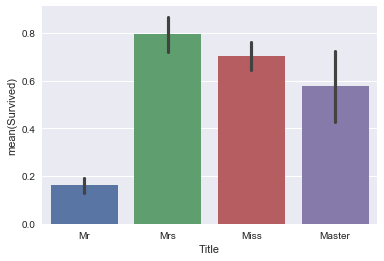

In [35]:
sns.barplot(x='Title', y='Survived', data=all_data)

## 8. Cabin

In [65]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].apply(lambda x: str(x)[0])
all_data['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

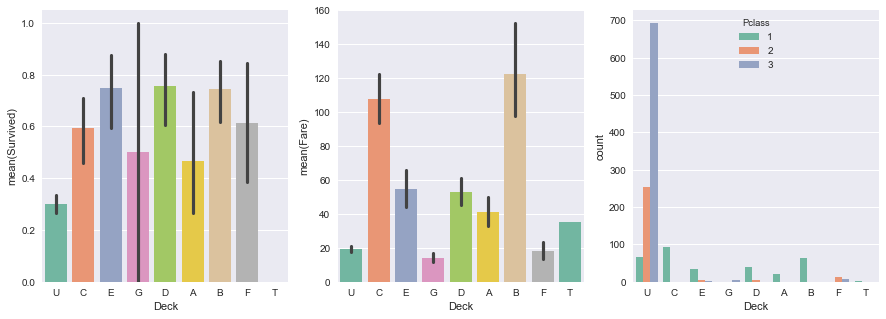

In [66]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3)
sns.barplot(x='Deck', y='Survived',data=all_data, palette='Set2', ax=axs[0])
sns.barplot(x='Deck', y='Fare',data=all_data, palette='Set2', ax=axs[1])
sns.countplot(x='Deck', hue='Pclass', data=all_data, palette='Set2', ax=axs[2])

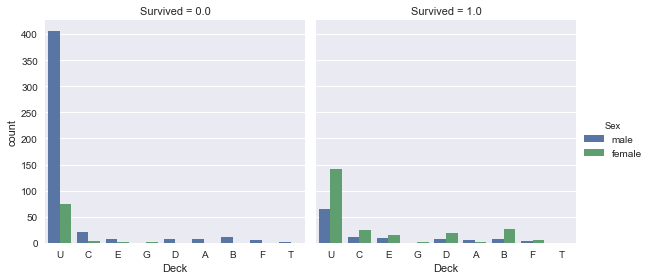

In [67]:
#sns.barplot(x='Deck', y='f_class3',data=all_data,palette='Set2')
sns.factorplot(x='Deck', hue='Sex', col='Survived', data=all_data, kind='count')

## 9. Embarked

### embarked from C = Cherbourg has most chance to survived

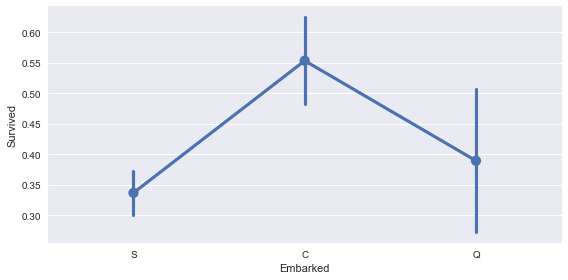

In [39]:
sns.factorplot('Embarked', 'Survived', data=all_data, aspect=2)

In [41]:
#sns.factorplot(x='Embarked', hue='m_single', col='Survived', data=all_data, kind='count')

# Feature Engineering

### filling the missing data and create the new feature as we discussed in data analysis section

## 1. fill Fare missing data

In [42]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_bin,Fare_class,Age_bin,Family_size,Title,Cabbin,Deck
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,NaN,NaN,"(60, 70]",1,Mr,Unknown,n


In [43]:
all_data[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


[(0, 300)]

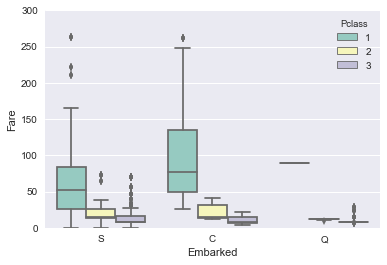

In [44]:
fig2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=all_data, palette="Set3")
fig2.set(ylim=(0, 300)) # there's a $500 at Pclass1
#print (all_data[['Pclass', 'Fare', 'Embarked']].groupby(['Embarked']).mean())

In [185]:
#sns.factorplot(x='Embarked', hue='Fare', col='Pclass', data=all_data, kind='count')

In [45]:
all_data['Fare'].fillna(13.3, inplace=True)

In [51]:
all_data['Fare_bin'] = all_data['Fare']
bins=[0,13, 21, 50, 600]
all_data['Fare_bin'] = pd.cut(all_data['Fare_bin'], bins)
#sns.factorplot(x='Fare_bin', hue='Sex', col='Survived', data=all_data, kind='count')

all_data['Fare_class'] = all_data['Fare'] / all_data['Pclass']
#facet = sns.FacetGrid(all_data[0:800], hue='Survived', aspect=2)
#facet.map(sns.kdeplot, 'Fare_class', shade=True)
bins=[0,4,10, 87, 1000]
all_data['Fare_class'] = pd.cut(all_data['Fare_class'], bins)

In [52]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_bin,Fare_class,Age_bin,Family_size,Title,Cabbin,Deck


## 2. fill Embarked missing data

In [53]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_bin,Fare_class,Age_bin,Family_size,Title,Cabbin,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,"(50, 600]","(10, 87]","(30, 40]",1,Miss,B28,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,"(50, 600]","(10, 87]","(60, 70]",1,Mrs,B28,B


In [54]:
all_data[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.403377


In [55]:
all_data['Embarked'].fillna('C', inplace=True)

In [56]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_bin,Fare_class,Age_bin,Family_size,Title,Cabbin,Deck


## 3. Family_group (new feature)

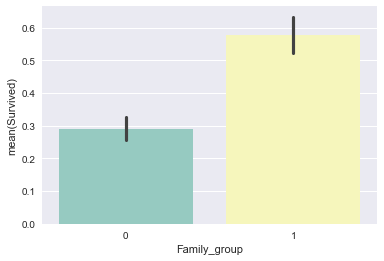

In [82]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 1
    else:
        return 0

all_data['Family_group'] = all_data['Family_size'].apply(Ticket_Label)
sns.barplot(x='Family_group', y='Survived', data=all_data, palette='Set3')

In [83]:
all_data[0:1]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_bin,Fare_class,Age_bin,Family_size,Title,Cabbin,Deck,Family_group
0,22.0,Unknown,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(0, 13]","(0, 4]","(20, 30]",2,Mr,Unknown,U,1


## 4. fill Age missing data

### Using random forest algorithm to filling the missing Age data

In [102]:
data_clean = all_data[['Age', 'Embarked', 'PassengerId', 'Pclass', 
                  'Sex', 'Fare_bin', 'Fare_class', 'Family_group', 'Title', 'Deck', 'Survived']]

In [103]:
tmp_feature = ['Embarked', 'Pclass', 'Sex', 'Fare_bin', 
               'Fare_class', 'Family_group', 'Title', 'Deck']
for item in tmp_feature:
    data_clean[item] = data_clean[item].astype('category').cat.codes

/Users/ifchicken/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
print (data_clean.shape)
data_clean.head()

(1309, 11)


,Age,Embarked,PassengerId,Pclass,Sex,Fare_bin,Fare_class,Family_group,Title,Deck,Survived
0,22.0,2,1,2,1,0,0,1,2,8,0.0
1,38.0,0,2,0,0,3,2,1,3,2,1.0
2,26.0,2,3,2,0,0,0,0,1,8,1.0
3,35.0,2,4,0,0,3,2,1,3,2,1.0
4,35.0,2,5,2,1,0,0,0,2,8,0.0


In [105]:
data_age = data_clean[['Age', 'Pclass', 'Sex', 'Title']]
print (data_age.shape)
data_age.head()

(1309, 4)


,Age,Pclass,Sex,Title
0,22.0,2,1,2
1,38.0,0,0,3
2,26.0,2,0,1
3,35.0,0,0,3
4,35.0,2,1,2


In [106]:
age_X_train = data_age.dropna().drop('Age', axis=1)
age_y_train = all_data['Age'].dropna()
age_X_test = data_age.loc[np.isnan(data_age['Age'])].drop('Age', axis=1)
print (age_X_train.shape, age_X_test.shape)

(1046, 3) (263, 3)


In [107]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300)
reg.fit(age_X_train, age_y_train)
age_y_pred = np.round(reg.predict(age_X_test), 1)
data_clean['Age'].loc[data_clean['Age'].isnull()] = age_y_pred

/Users/ifchicken/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/ifchicken/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [108]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age             1309 non-null float64
Embarked        1309 non-null int8
PassengerId     1309 non-null int64
Pclass          1309 non-null int8
Sex             1309 non-null int8
Fare_bin        1309 non-null int8
Fare_class      1309 non-null int8
Family_group    1309 non-null int8
Title           1309 non-null int8
Deck            1309 non-null int8
Survived        891 non-null float64
dtypes: float64(2), int64(1), int8(8)
memory usage: 41.0 KB


# Save clean data

In [109]:
data_clean.to_csv('data_clean.csv', index=False)

## create result using scikit-learn

In [92]:
X_train = model[0:891].drop(['PassengerId'], axis=1)
y_train = train['Survived']
X_test = model[891:].drop(['PassengerId'], axis=1)

In [93]:
X_train.head()

,Age,Embarked,Pclass,Sex,Fare_bin,Fare_class,Family_group,Title,Deck
0,22.0,2,2,1,0,0,1,2,8
1,38.0,0,0,0,3,2,1,3,2
2,26.0,2,2,0,0,0,0,1,8
3,35.0,2,0,0,3,2,1,3,2
4,35.0,2,2,1,0,0,0,2,8


In [96]:
X_test.head()

,Age,Embarked,Pclass,Sex,Fare_bin,Fare_class,Family_group,Title,Deck
891,34.5,1,2,1,0,0,0,2,8
892,47.0,2,2,0,0,0,1,3,8
893,62.0,1,1,1,0,1,0,2,8
894,27.0,2,2,1,0,0,0,2,8
895,22.0,2,2,0,0,1,1,3,8


In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth=5))
clf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth=5))
clf = clf.fit(X_train, y_train)
    
predict = clf.predict(X_train)
acc = accuracy_score(predict, y_train)
print("train accuracy = ", acc * 100, "%")

train accuracy =  88.3277216611 %


In [97]:
y_test = clf.predict(X_test)
y_test = y_test.astype(int).reshape(test.shape[0])
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_test})

In [98]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [99]:
output.to_csv('submit.csv', index=False)